In [2]:
#grover-search-algorithm
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator, Statevector
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

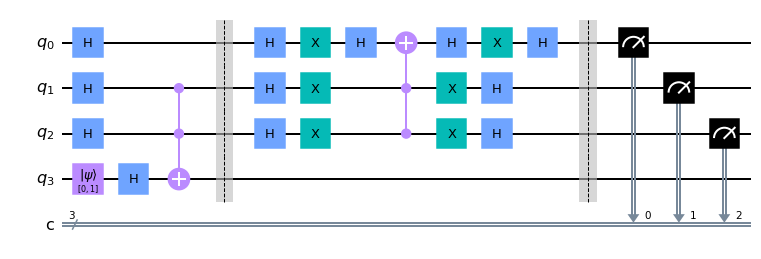

In [63]:
#circuito
#solucion: 011, 111
gc = QuantumCircuit(4,3)
gc.h([0,1,2])

#subcircuito
#gc.x(3)
gc.initialize([0, 1], 3)
gc.h(3)
gc.ccx(1, 2, 3)
gc.barrier(range(4))
gc.h([0,1,2])
gc.x([0,1,2])
gc.h(0)
gc.ccx(1,2,0)
gc.h(0)
gc.x([0,1,2])
gc.h([0,1,2])

gc.barrier(range(4))
gc.measure(range(3), range(3))

#subc.draw('mpl')
gc.draw('mpl')

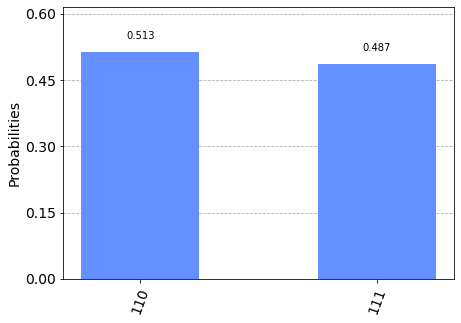

In [64]:
backend = QasmSimulator()
job = backend.run(gc, shots=1024)
result = job.result()
counts = result.get_counts(gc)
plot_histogram(counts)

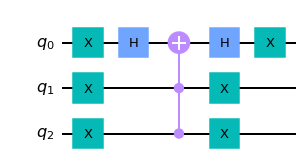

In [28]:
c = QuantumCircuit(3)
for i in range(3):
    c.x(i)
c.h(0)
c.ccx(1,2,0)
c.h(0)
for i in range(3):
    c.x(i)
c.draw('mpl')

In [32]:
state = Statevector.from_int(7, 2**3)

state = state.evolve(c)
state.draw('latex')

<IPython.core.display.Latex object>

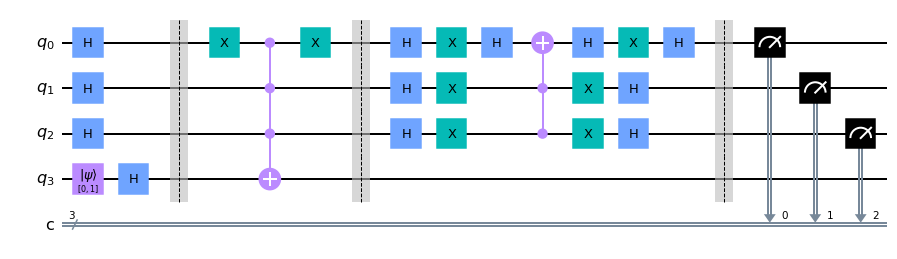

In [6]:
#circuito
#solucion: 011, 111
gc = QuantumCircuit(4,3)
gc.h([0,1,2])

#subcircuito
#gc.x(3)
gc.initialize([0, 1], 3)
gc.h(3)
gc.barrier(range(4))
gc.x(0)
gc.mcx([0, 1, 2], 3)
gc.x(0)
gc.barrier(range(4))
gc.h([0,1,2])
gc.x([0,1,2])
gc.h(0)
gc.ccx(1,2,0)
gc.h(0)
gc.x([0,1,2])
gc.h([0,1,2])

gc.barrier(range(4))
gc.measure(range(3), range(3))

#subc.draw('mpl')
gc.draw('mpl')

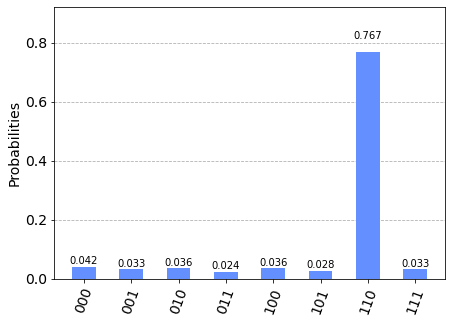

In [7]:
backend = QasmSimulator()
job = backend.run(gc, shots=1024)
result = job.result()
counts = result.get_counts(gc)
plot_histogram(counts)